In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#parameters
gas_vehicle_price=30000
hybrid_vehicle_price=35000
electric_vehicle_price=60000
inflation=1.02
gas_price = 3.45
electricity_price = 0.17
years = 20
y = list(range(0,years))
maintenance_gas_hybrid = 0.09
maintenance_electric = maintenance_gas_hybrid/2
insurance_gas = 1000
insurance_hybrid = 1100
insurance_electric =1230
miles = 15000
gas_mpg = 30
hybrid_mpg = 40
electric_range = 200
kilowatthour_battery_usage = 60
gas_hybrid_random_costs = 1500
electric_random_costs = 1000

In [2]:

class cost_analysis:
    def __init__(gas,hybrid,electric,gas_list,hybrid_list,electric_list):
        self.gas = gas
        self.hybrid = hybrid
        self.electric = electric
        self.gas_list = gas_list
        self.hybrid_list = hybrid_list
        self.electric_list = electric_list

    def purchase(self):
        #here I purchase either a Toyota RAV4 for gas vehicle, a Toyota RAV4 hybrid for the hybrid,
        #or a Ford Mustang Mach-E for the electric vehcile
        self.gas = gas_vehicle_price
        self.hybrid = hybrid_vehicle_price
        self.electric = electric_vehicle_price
        self.gas_list = []
        self.hybrid_list = []
        self.electric_list = []
    
    def keep(self, years):
        gas_cost = gas_price
        electricity_cost = electricity_price
        for year in range(0,years):
            gas_cost = gas_cost * inflation
            electricity_cost = electricity_cost * inflation
            gas_cost = np.round(gas_cost + np.random.normal(), decimals = 2)
            electricity_cost = np.round(electricity_cost, decimals = 4)
            r = np.random.normal()
            if r > - 1:
                self.gas = self.gas + (gas_cost * (miles/gas_mpg)) + (maintenance_gas_hybrid * miles)
                self.hybrid = self.hybrid + (gas_cost * (miles/hybrid_mpg)) + (maintenance_gas_hybrid * miles)
                self.electric = self.electric + (electricity_cost*kilowatthour_battery_usage)*(miles/electric_range)
                self.electric = self.electric + (maintenance_electric * miles)
            else: 
                self.gas = self.gas + (gas_cost * (miles/gas_mpg)) + gas_hybrid_random_costs
                self.gas = self.gas + (maintenance_gas_hybrid * miles)
                self.hybrid = self.hybrid + (gas_cost * (miles/hybrid_mpg)) + gas_hybrid_random_costs 
                self.hybrid = self.hybrid + (maintenance_gas_hybrid * miles)
                self.electric = self.electric + (electricity_cost*kilowatthour_battery_usage)*(miles/electric_range) 
                self.elecrtic = self.electric + electric_random_costs + (maintenance_electric * miles)
            #insurance
            self.gas = self.gas + insurance_gas
            self.hybrid = self.hybrid + insurance_hybrid 
            self.electric = self.electric + insurance_electric
            self.gas_list.append(self.gas)
            self.hybrid_list.append(self.hybrid)
            self.electric_list.append(self.electric)
        return self.gas, self.hybrid, self.electric



In [3]:
cost = cost_analysis
cost_analysis.purchase(cost)

In [4]:
cost.gas_list

[]

In [5]:
gas_vehicle_total_cost, hybrid_vehicle_total_cost, electric_vehicle_total_cost = cost_analysis.keep(cost,years)

In [6]:
cost.electric

114362.55000000003

In [7]:
cost.hybrid

165618.75

In [8]:
cost.gas

183825.0

In [9]:
print(len(cost.gas_list))
print(len(cost.gas_list))
print(len(cost.gas_list))
print(len(y))

20
20
20
20


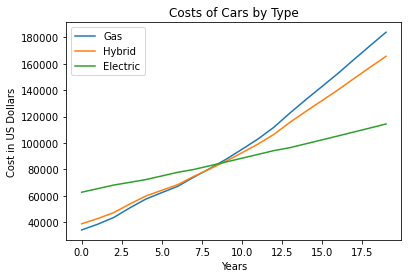

In [10]:
plt.plot(y,cost.gas_list, label = "Gas")
plt.plot(y,cost.hybrid_list, label = "Hybrid")
plt.plot(y,cost.electric_list, label = "Electric")
plt.title("Costs of Cars by Type")
plt.xlabel("Years")
plt.ylabel("Cost in US Dollars")
plt.legend()
plt.show()

In [11]:
gas_cost_per_mile = cost.gas/(years * miles)
hybrid_cost_per_mile = cost.hybrid/(years * miles)
electric_cost_per_mile = cost.electric/(years * miles)
print('Gas cost per mile:', gas_cost_per_mile)
print('Hybrid cost per mile:', hybrid_cost_per_mile)
print('Electric cost per mile:', electric_cost_per_mile)

Gas cost per mile: 0.61275
Hybrid cost per mile: 0.5520625
Electric cost per mile: 0.3812085000000001
